<a href="https://colab.research.google.com/github/yakupilyas/GoogleColabIntro/blob/main/ders3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resimleri internet ortamından indirme zip açma ve çalışma klasörüne kopyalama işlemi

In [2]:
!wget -q https://github.com/albumentations-team/albumentations_examples/archive/master.zip -O /tmp/albumentations_examples.zip
!unzip -o -qq /tmp/albumentations_examples.zip -d /tmp/albumentations_examples
!cp -r /tmp/albumentations_examples/albumentations_examples-master/notebooks/images .
!echo "Images are successfully downloaded"

Images are successfully downloaded


pip ile örnek paket yükleme

In [3]:
!pip install -q -U albumentations
!echo "$(pip freeze | grep albumentations) is successfully installed"

     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 952kB 25.3MB/s 
     |████████████████████████████████| 37.6MB 79kB/s 
albumentations==0.5.2 is successfully installed


kütüphane tanımlamaları yapalım

In [4]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

resim gösterme fonksiyonu

In [5]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

OpenCV bir görüntüyü BGR formatında okur (bu nedenle görüntünün renk kanalları şu sıraya sahiptir: Mavi, Yeşil, Kırmızı). Albümler, en yaygın ve popüler RGB görüntü formatını kullanır. Bu nedenle OpenCV'yi kullanırken, görüntü formatını açıkça RGB'ye dönüştürmemiz gerekir.

renk tonu parlaklık ve doygunluk HSV

RGB değerleri [[[  0  21 190]
  [  0  21 190]
  [  0  21 191]
  ...
  [  5  17 199]
  [  0  15 199]
  [  0  15 200]]

 [[  0  21 192]
  [  0  21 192]
  [  0  21 193]
  ...
  [  5  17 197]
  [  0  16 197]
  [  0  16 197]]

 [[  0  21 195]
  [  0  21 195]
  [  0  21 194]
  ...
  [  0  18 199]
  [  0  16 196]
  [  0  16 195]]

 ...

 [[177  25 225]
  [177  25 225]
  [179  23 223]
  ...
  [179  22 235]
  [179  22 235]
  [179  22 236]]

 [[177  25 224]
  [177  25 223]
  [177  25 223]
  ...
  [179  22 235]
  [179  22 235]
  [179  22 236]]

 [[177  25 223]
  [177  25 222]
  [177  25 222]
  ...
  [179  22 235]
  [179  22 235]
  [179  22 236]]]


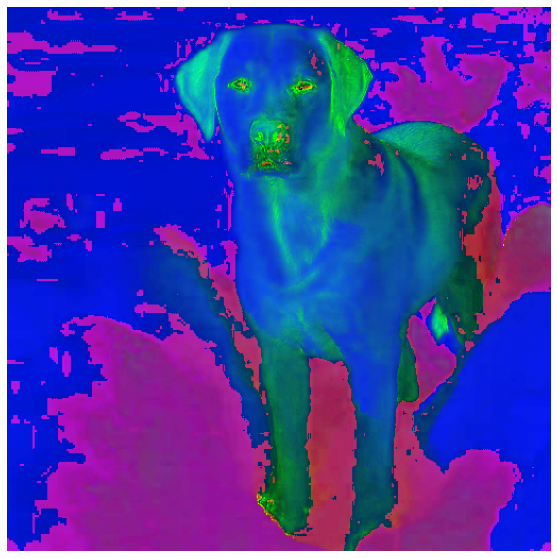

In [11]:
image = cv2.imread('images/image_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
visualize(image)
print("RGB değerleri",image)

CIE-LAB Renk Kanalı: CIE 1931 renk uzayları, elektromanyetik görünür spektrumdaki dalga boylarının dağılımı ile insan renk görüşünde fizyolojik olarak algılanan renkler arasındaki ilk tanımlanmış kantitatif bağlantılardır. Bu renk uzaylarını tanımlayan matematiksel ilişkiler, renk mürekkepleri, ışıklı ekranlar ve dijital kameralar gibi kayıt aygıtlarıyla uğraşırken önemli olan renk yönetimi için gerekli araçlardır.

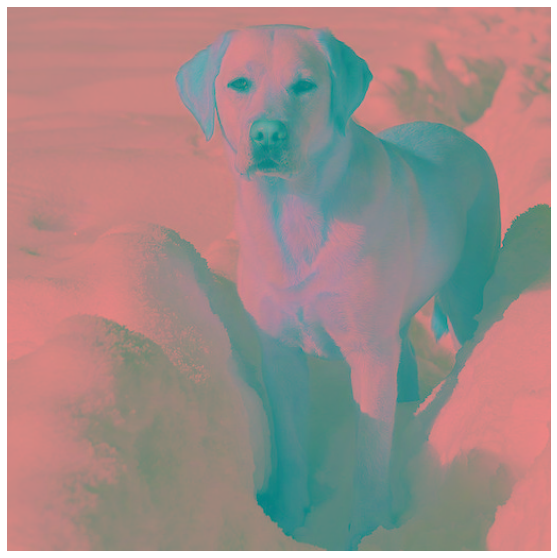

In [12]:

image = cv2.imread('images/image_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
visualize(image)


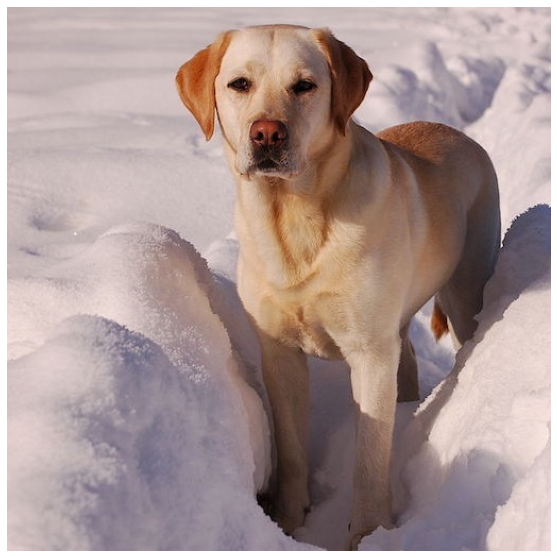

In [13]:
image = cv2.imread('images/image_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

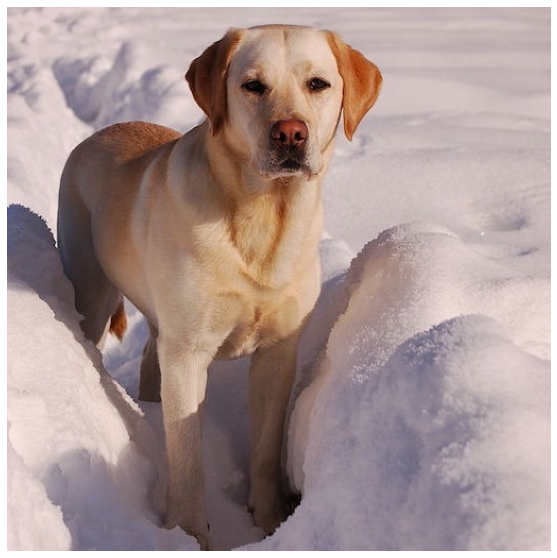

In [21]:
transform = A.HorizontalFlip(p=0.5)
random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

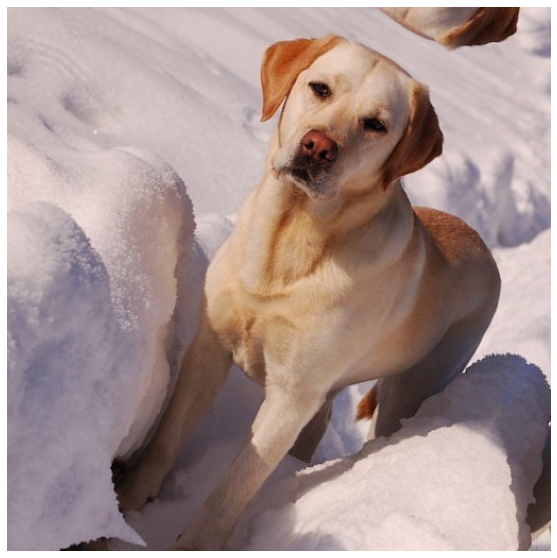

In [22]:
transform = A.ShiftScaleRotate(p=0.5)
random.seed(7) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

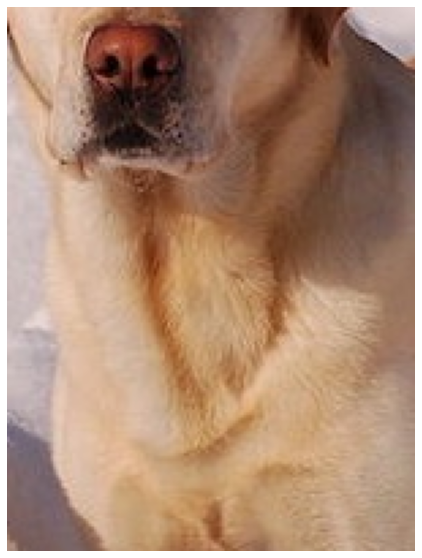

In [23]:
image = cv2.imread('images/image_3.jpg')


roi =image[100:300, 200:350]
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
kenar = cv2.Canny(roi,100,100)
visualize(roi)
